In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [60]:
import tensorflow as tf

In [61]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [63]:
import warnings
warnings.filterwarnings('ignore') 

In [64]:
dataset = pd.read_csv("../data/A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
mnist_data = pd.read_csv("../data/mnist_train.csv").astype('float32')
mnist_data.rename(columns={'0':'label'}, inplace=True)

In [65]:
mnist_data.iloc[:,0] = mnist_data.iloc[:,0].replace({0.0:30.0, 1.0:31.0, 2.0:32.0, 3.0:33.0, 4.0:34.0, 5.0:35.0, 6.0:36.0, 
                                                    7.0:37.0, 8.0:38.0, 9.0:39.0})
mnist_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
dataset = dataset.append(mnist_data)

In [67]:
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [99]:
print(X)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
59995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

       28x21  28x22  28x23  28x24  28x25  28x26  28

In [100]:
print(y)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
59995    38.0
59996    33.0
59997    35.0
59998    36.0
59999    38.0
Name: label, Length: 432451, dtype: float32


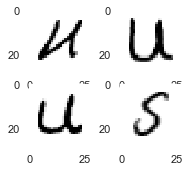

In [68]:
X_shuffle = shuffle(X)

plt.figure(figsize = (3,2.5), frameon=False)
plt.rcParams["axes.grid"] = False
row, col = 2, 2
for i in range(4):  
    plt.subplot(col, row, i+1)
    plt.imshow(
		X_shuffle.iloc[i].values.reshape(28,28),
		interpolation='nearest', cmap='Greys')
plt.show()

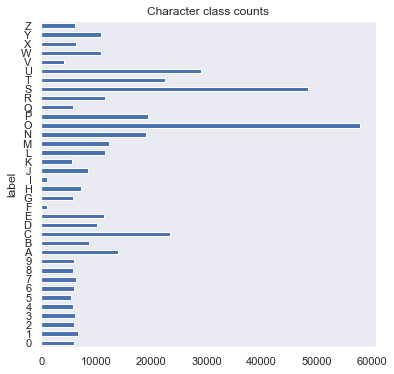

In [69]:
label_mapper = {
	0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'
    ,30:'0', 31:'1', 32:'2', 33:'3', 34:'4', 35:'5', 36:'6', 37:'7', 38:'8', 39:'9'}
dataset['label'] = dataset['label'].map(label_mapper)
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(6,6))

plt.title("Character class counts")
plt.show()

In [105]:
# split data+labels
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

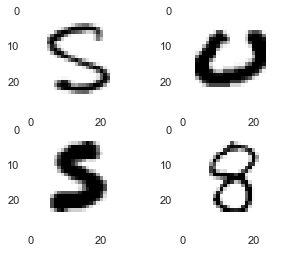

In [106]:
X_shuffle = shuffle(X_train)

plt.figure(figsize = (5, 4), frameon=False)
plt.rcParams["axes.grid"] = False
plt.axis('off')
row, col = 2, 2
for i in range(4):  
    plt.subplot(col, row, i+1)
    plt.imshow(
		X_shuffle[i].reshape(28,28),
		interpolation='nearest', cmap='Greys')
plt.show()

In [107]:
print(X_train.shape)

(324338, 784)


In [109]:
# reshaping 1D array to 2D: 784 = 28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [110]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [93]:
#define model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

In [96]:
# compile model

model.compile(
	loss='categorical_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 36)                4644      
                                                      

In [97]:
history = model.fit(
	X_train, y_train,
	validation_data=(X_test, y_test),
	epochs=5, batch_size=200, verbose=2
)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ggeorge\Anaconda3\envs\tensor-env\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 40) and (None, 36) are incompatible


In [98]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(324338, 28, 28, 1) (324338, 40) (108113, 28, 28, 1) (108113, 40)


In [102]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [112]:
print(len(y.unique()))

36
